### Goal

In [20]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
import os, sys
import pandas as pd
import numpy as np
import math

import rdkit 

import matplotlib.pyplot as plt

sys.path.append("../../data_analysis/")
import helper as hp

In [22]:
savepath = "F01_new_machine_benchmarking_VIRGIN/"
os.makedirs(savepath, exist_ok=True)

In [23]:
df = pd.read_excel("/Users/michaelmoret/tinyverse/krap/data/pulling_new_machine_benchmark/20240912_DAN_NK_virgin_100hairs_tensile.xlsx", 
                 skiprows=2)
df.head(3)

,RECORD,CROSS-SECTIONAL AREA,MEAN DIAMETER,MAX DIAMETER,MIN DIAMETER,ELASTIC EMOD,ELASTIC GRADIENT,ELASTIC EXT,ELASTIC STRESS,PLATEAU LOAD,...,STRESS 25%,WORK 25%,YIELD EXT,POSTYIELD GRADIENT,BREAK EXT,BREAK LOAD,BREAK STRESS,BREAK STRESS.1,TOTAL WORK,TOUGHNESS
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,sq. microns,Microns,Microns,Microns,Pascals,gmf/mm,% Strain,gmf/sq micron,gmf,...,gmf/sq micron,Joules,% Strain,gmf/mm,% Strain,gmf,gmf/sq micron,MPa,Joules,Joules/m3
2,1,2993.6,69,84.9,44.9,3854000000,38.67,3.06,0.01301,40.89,...,0.015,0.002898,25.52,3.969,47.94,71.45,0.02387,234.084735,0.006879,75560000


In [24]:
df = df.drop([0, 1]).reset_index(drop=True)
df.head(3)

,RECORD,CROSS-SECTIONAL AREA,MEAN DIAMETER,MAX DIAMETER,MIN DIAMETER,ELASTIC EMOD,ELASTIC GRADIENT,ELASTIC EXT,ELASTIC STRESS,PLATEAU LOAD,...,STRESS 25%,WORK 25%,YIELD EXT,POSTYIELD GRADIENT,BREAK EXT,BREAK LOAD,BREAK STRESS,BREAK STRESS.1,TOTAL WORK,TOUGHNESS
0,1,2993.6,69,84.9,44.9,3854000000,38.67,3.06,0.01301,40.89,...,0.015,0.002898,25.52,3.969,47.94,71.45,0.02387,234.084735,0.006879,75560000
1,2,3434.6,67.5,75.3,58.1,4197000000,48.68,2.68,0.01205,46.79,...,0.01518,0.003291,25.22,4.361,47.75,81.7,0.02379,233.300204,0.007773,74990000
2,3,4685.3,78.4,87.1,68.5,3946000000,62.28,2.97,0.01195,60.17,...,0.01426,0.004274,23.17,5.259,43.36,96.15,0.02052,201.232458,0.008669,61140000


In [25]:
len(df)

106

In [26]:
print(df.columns)

Index(['RECORD', 'CROSS-SECTIONAL AREA', 'MEAN DIAMETER', 'MAX DIAMETER',
       'MIN DIAMETER', 'ELASTIC EMOD', 'ELASTIC GRADIENT', 'ELASTIC EXT',
       'ELASTIC STRESS', 'PLATEAU LOAD', 'PLATEAU STRESS', 'LOAD 15%',
       'STRESS 15%', 'WORK 15%', 'LOAD 25%', 'STRESS 25%', 'WORK 25%',
       'YIELD EXT', 'POSTYIELD GRADIENT', 'BREAK EXT', 'BREAK LOAD',
       'BREAK STRESS', 'BREAK STRESS.1', 'TOTAL WORK', 'TOUGHNESS'],
      dtype='object')


In [27]:
df_bio = df[['BREAK STRESS']]
df_bio.head(3)

,BREAK STRESS
0,0.02387
1,0.02379
2,0.02052


In [28]:
df_bio = df_bio.dropna()
len(df_bio)

101

### Break stress

In [29]:
all_samples = list(df_bio['BREAK STRESS'])
all_samples[:2]

[0.02387, 0.02379]

In [30]:
from scipy.stats import ks_2samp

N_REPEATS = 100
d_n_pvalues = {}
for n in range(10, 100, 1):
    for nr in range(N_REPEATS):
        sampled_values = np.random.choice(all_samples, n)
        res = ks_2samp(all_samples, sampled_values, alternative='two-sided', mode='auto')
        # get the p-value
        p_value = res[1]
        if n not in d_n_pvalues:
            d_n_pvalues[n] = []
        d_n_pvalues[n].append(round(p_value,4))
len(d_n_pvalues)

90

In [31]:
mean_pvalues = []
std_values = []
for i in range(10, 100, 1):
    mean_pvalues.append(np.mean(d_n_pvalues[i]))
    std_values.append(np.std(d_n_pvalues[i]))

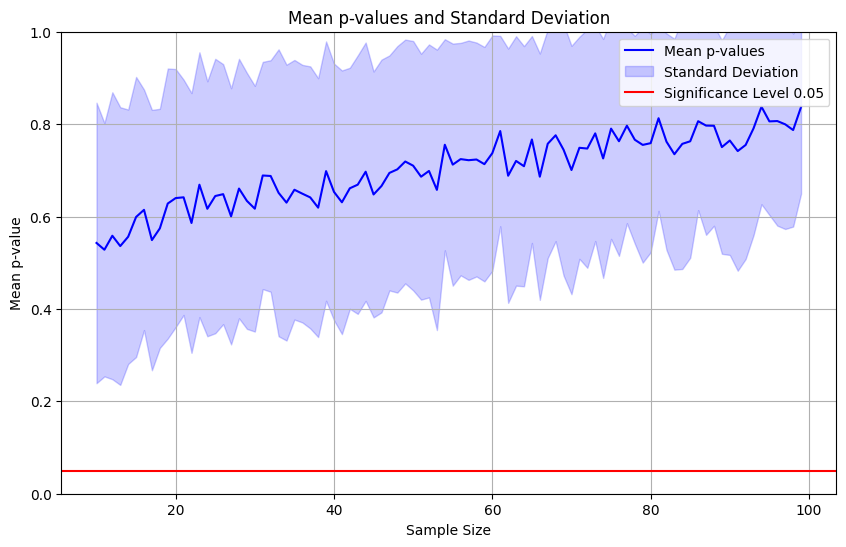

In [32]:
# Plotting the mean and standard deviation
x = range(10, 100)
mean_pvalues = np.array(mean_pvalues)
std_values = np.array(std_values)

plt.figure(figsize=(10, 6))
plt.plot(x, mean_pvalues, label='Mean p-values', color='blue')
plt.fill_between(x, mean_pvalues - std_values, mean_pvalues + std_values, color='blue', alpha=0.2, label='Standard Deviation')
plt.xlabel('Sample Size')
plt.ylabel('Mean p-value')
plt.title('Mean p-values and Standard Deviation')
plt.ylim(0, 1.0)
# add a red line at 0.05
plt.axhline(y=0.05, color='r', linestyle='-', label='Significance Level 0.05')
plt.legend()
plt.grid(True)
plt.show()

let's look at the minimum p values 

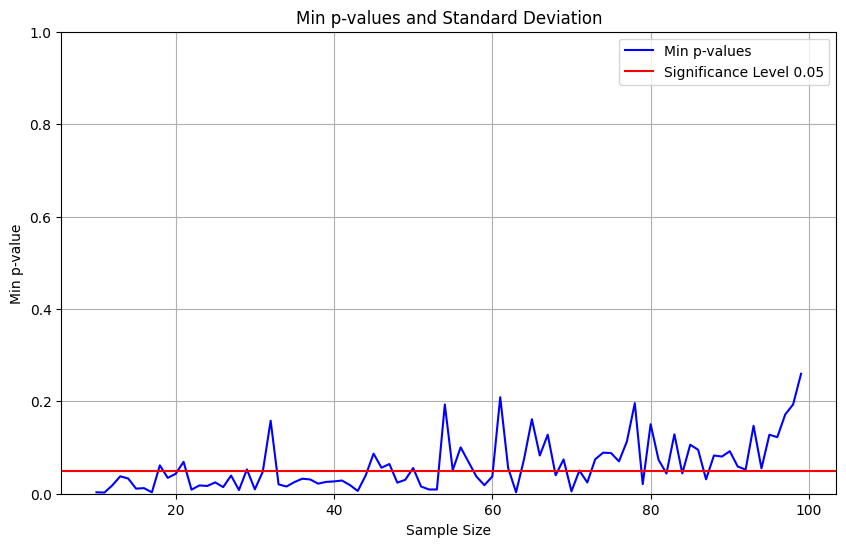

In [33]:
min_pvalues = []
for i in range(10, 100, 1):
    min_pvalues.append(np.min(d_n_pvalues[i]))

# Plotting the mean and standard deviation
x = range(10, 100)
min_pvalues = np.array(min_pvalues)

plt.figure(figsize=(10, 6))
plt.plot(x, min_pvalues, label='Min p-values', color='blue')
plt.xlabel('Sample Size')
plt.ylabel('Min p-value')
plt.title('Min p-values and Standard Deviation')
plt.ylim(0, 1.0)
plt.axhline(y=0.05, color='r', linestyle='-', label='Significance Level 0.05')
plt.legend()
plt.grid(True)
plt.show()

In [34]:
percent_ok = []
THRES = 0.05
for i in range(10, 100, 1):
    values = d_n_pvalues[i]
    count = len([v for v in values if v > THRES])
    percent_ok.append(count / len(values))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


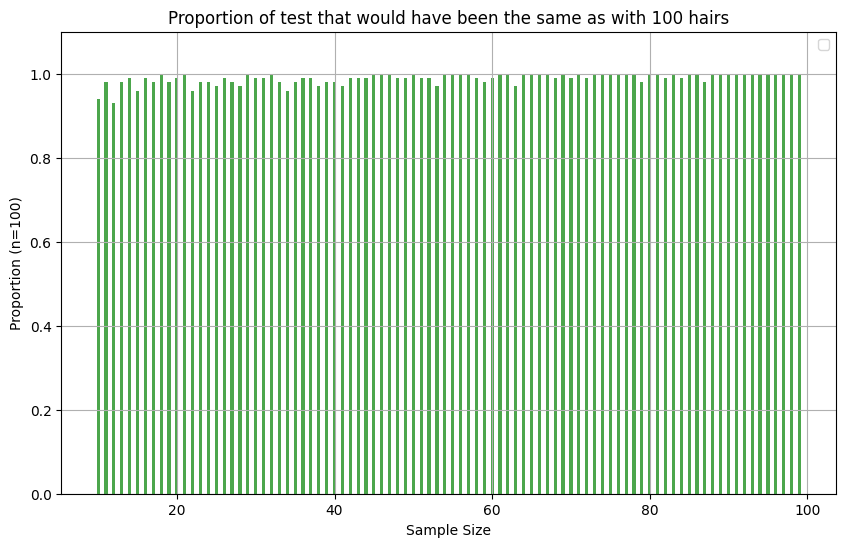

In [35]:
# Plotting the percent_ok as a bar plot
plt.figure(figsize=(10, 6))
plt.bar(range(10, 100), percent_ok, color='green', alpha=0.7, width=0.4)
plt.xlabel('Sample Size')
plt.ylabel(f'Proportion (n={N_REPEATS})')
plt.title('Proportion of test that would have been the same as with 100 hairs')
plt.ylim(0, 1.1)
plt.legend()
plt.grid(True)
plt.show()

P-value of Kolmogorov-Smirnov test:
- two-sided: the null hypothesis is that the two distributions are the same   
--> If the KS statistic is large, then the p-value will be small, and this may be taken as evidence against the null hypothesis in favor of the alternative.

### let's looks at medians

In [36]:
N_REPEATS = 42
d_n_medians = {}
for n in range(10, 100, 1):
    for nr in range(N_REPEATS):
        sampled_values = np.random.choice(all_samples, n)
        median = round(np.median(sampled_values),4)
        if n not in d_n_medians:
            d_n_medians[n] = []
        d_n_medians[n].append(median)
len(d_n_medians)

90

In [37]:
round(np.median(all_samples),4)

0.0237

In [38]:
for i in range(10, 100, 1):
    print(i, round(np.median(d_n_medians[i]),4), round(np.std(d_n_medians[i]),4))

10 0.0237 0.0007
11 0.0238 0.0009
12 0.0237 0.0007
13 0.0237 0.0008
14 0.0237 0.0006
15 0.0235 0.0006
16 0.0236 0.0007
17 0.0236 0.0005
18 0.0238 0.0005
19 0.0237 0.0006
20 0.0238 0.0005
21 0.0236 0.0004
22 0.0238 0.0005
23 0.0238 0.0004
24 0.0237 0.0005
25 0.0238 0.0005
26 0.0236 0.0004
27 0.0237 0.0004
28 0.0237 0.0006
29 0.0238 0.0004
30 0.0237 0.0004
31 0.0238 0.0004
32 0.0237 0.0004
33 0.0237 0.0004
34 0.0237 0.0004
35 0.0236 0.0004
36 0.0236 0.0003
37 0.0238 0.0004
38 0.0237 0.0003
39 0.0238 0.0004
40 0.0237 0.0004
41 0.0238 0.0003
42 0.0237 0.0003
43 0.0238 0.0003
44 0.0238 0.0004
45 0.0238 0.0003
46 0.0237 0.0003
47 0.0237 0.0003
48 0.0237 0.0003
49 0.0237 0.0003
50 0.0238 0.0003
51 0.0238 0.0003
52 0.0237 0.0004
53 0.0238 0.0002
54 0.0237 0.0003
55 0.0238 0.0002
56 0.0237 0.0003
57 0.0237 0.0003
58 0.0237 0.0003
59 0.0238 0.0003
60 0.0238 0.0003
61 0.0238 0.0003
62 0.0238 0.0002
63 0.0237 0.0002
64 0.0238 0.0003
65 0.0238 0.0003
66 0.0236 0.0003
67 0.0238 0.0002
68 0.0238 0.00